In [1]:
import astropy
import dogpile.cache
import fuzzywuzzy
import os
import re
import marvin
import marvin.utils.plot.map as mapplot
import matplotlib
import numpy as np
import numpyencoder
import packaging
import pandas
import photutils
import raven
import scipy
import sdss_access
import sdsstools
import webargs
import werkzeug
import yamlordereddictloader


import matplotlib.pyplot as plt
from marvin import config
from marvin.tools import Maps
from marvin.tools.image import Image
from marvin.tools.cube import Cube
from marvin.tools import RSS
from marvin.utils.general.general import get_drpall_table
from marvin.api.api import Interaction

from astropy.io import fits
from astropy import units as u

%matplotlib inline
plt.style.use('seaborn-darkgrid')  # set matplotlib style sheet

config.mode = 'remote'
config.access = 'public'
config.use_sentry = True
config.setRelease('DR17')
config.setDR('DR17')
#config.sasurl
#config.urlmap
config.switchSasUrl(sasmode='mirror', ngrokid=None, port=5000, test=False, base=None, public=True)

[WARNING]: cannot initiate Sentry error reporting: unknown error. (UserWarning)
[INFO]: No release version set. Setting default to DR17


<Marvin Cube (plateifu='8485-1901', mode='remote', data_origin='api')>
<Marvin Spaxel (plateifu=8485-1901, x=17, y=17; x_cen=0, y_cen=0, loaded=cube)>


<Axes: xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

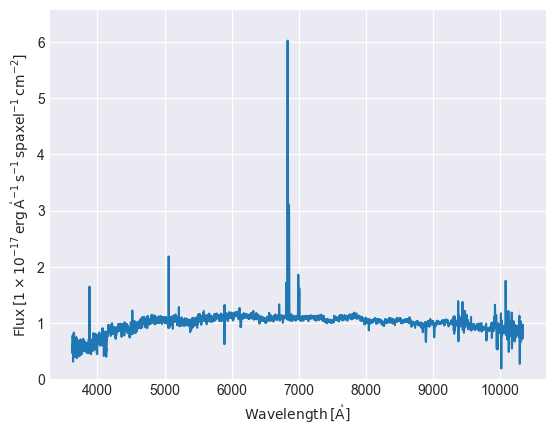

In [2]:
#troubleshooting code

#print(os.environ['SAS_BASE_DIR'])
#print(marvin.config.urlmap)
cube = Cube(plateifu='8485-1901')
print(cube)
#print(f"RA: {cube.ra}")
#print(f"Dec: {cube.dec}")

spaxel = cube.getSpaxel(0,0)
print(spaxel)

flux = spaxel.flux
flux.plot()


#print(cube)
#print(cube.header)
#print(f"RA: {cube.ra}")
#print(f"Dec: {cube.dec}")

# access the spaxel from the lower left corner of the Cube for 8485-1901
#spaxel = cube.getSpaxel(0,0)
# represent the spaxel
#print(spaxel)

#flux = spaxel.flux
#flux.plot()

#print(flux.value, flux.ivar, flux.wavelength)

#maps = cube.getMaps()
#print(maps)

#maps = Maps(plateifu='7443-12703')
#maps.datamodel

#cube.nsa

#print(f"Database access: {config.db}")

In [3]:
# get and format an API url to retrieve basic Cube properties
plateifu = '7443-12701'
url = config.urlmap['api']['getCube']['url']

# create and send the request, and retrieve a response
response = Interaction(url.format(name=plateifu))

# check your response's status code
print(response.status_code, "good if 200")
200

# get the data in your response
data = response.getData()
#print(data)

200 good if 200


In [31]:
images = Image.from_list(['7443-12701', '7443-12702'])
images[0].show()
images[1].show()

[WARNING]: subprocess 9976 is still running (ResourceWarning)
[WARNING]: subprocess 14624 is still running (ResourceWarning)


In [41]:
images2 = marvin.utils.general.images.get_images_by_plate(8485)
for image in images2:
    image.show()

[WARNING]: subprocess 24728 is still running (ResourceWarning)
[WARNING]: subprocess 25280 is still running (ResourceWarning)
[WARNING]: subprocess 24836 is still running (ResourceWarning)
[WARNING]: subprocess 20564 is still running (ResourceWarning)
[WARNING]: subprocess 23112 is still running (ResourceWarning)
[WARNING]: subprocess 18324 is still running (ResourceWarning)
[WARNING]: subprocess 23796 is still running (ResourceWarning)
[WARNING]: subprocess 22808 is still running (ResourceWarning)
[WARNING]: subprocess 21840 is still running (ResourceWarning)
[WARNING]: subprocess 21468 is still running (ResourceWarning)
[WARNING]: subprocess 1056 is still running (ResourceWarning)
[WARNING]: subprocess 20352 is still running (ResourceWarning)
[WARNING]: subprocess 588 is still running (ResourceWarning)
[WARNING]: subprocess 22268 is still running (ResourceWarning)
[WARNING]: subprocess 22196 is still running (ResourceWarning)
[WARNING]: subprocess 21576 is still running (ResourceWarn

In [55]:
#maps = cube.getMaps()
#maps.datamodel()
#hamap = maps.getMap('emline_sflux',channel='ha_6564')
#hamap.plot()

In [48]:
# redo VCARRS with expanded search using the small angle approx
# use sklearn to train a model on sorting spiral vs elliptical
# repeat rotation curve and CLD measurements to calculate DM content
# create histograms of DM fraction vs # of galaxies, see if there's any differences between spiral and elliptical
# hypothesis: elliptical galaxies have higher DM content due to slower rotation and random stellar orbits

11007-3701 0.025469143
11979-3701 0.12434399
8079-9101 0.023239123
9499-1901 0.045379132
7815-6101 0.01716112
9046-3704 0.04770765
9502-6102 0.017289378
8096-1902 0.017813016
No cube for 12187-12704
12673-3701 0.029560467
8563-12703 0.042961407
11827-12701 0.14428656
8485-6102 0.03757053
8088-12702 0.018302817
9497-3704 0.048596174


[WARNING]: cannot load NSA information for mangaid='51-74'. (MarvinUserWarning)


No cube for 12044-3703
8588-3701 0.13027152


[WARNING]: cannot load NSA information for mangaid='50-13'. (MarvinUserWarning)


No cube for 8479-3702
11942-12703 0.13347094
No cube for 11843-9102
8716-1902 0.054846793
7990-6102 0.026790084
8591-12705 0.040730234
12085-6104 0.094198294
10516-1901 0.023647517
11833-1901 0.03049273
10494-1901 0.03263774
7981-6101 0.03756313
8987-12703 0.0478003
9491-12705 0.14161065
8657-12704 0.01806838
8998-1901 0.021723116


[WARNING]: cannot load NSA information for mangaid='51-228'. (MarvinUserWarning)


No cube for 10488-12703
9886-12702 0.041688696
8449-9102 0.021218615
7991-6102 0.027517285
9509-9102 0.045572318


[WARNING]: cannot load NSA information for mangaid='51-71'. (MarvinUserWarning)


No cube for 12042-1902
9047-12704 0.110115
9182-12705 0.04096913
7992-12702 0.061477426
8148-3701 0.068740025
7959-9101 0.082955144
10515-3704 0.030251913
8712-12705 0.03286848
10502-6101 0.07874526
No cube for 12187-3702
10506-12704 0.017284023
12487-3701 0.025975717
12487-12702 0.048039053


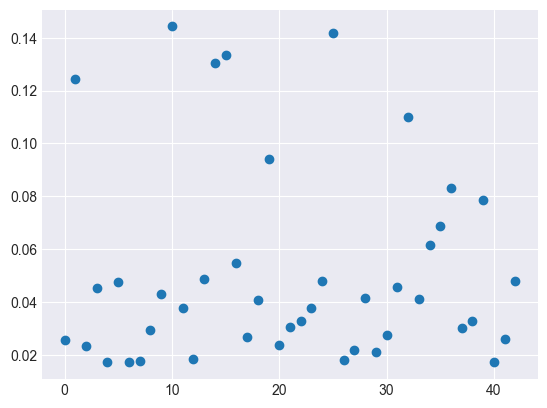

In [86]:
images3 = marvin.utils.general.images.get_random_images(50)
test = []

for item in images3:
    #print(item.__dict__)
    ifu = item.plateifu

    try:
        cube = Cube(plateifu = ifu)
        print(ifu, cube.nsa['z'])
        test.append(cube.nsa['z'])

    except:
        print(f"No cube for {ifu}")

xaxis = np.arange(0, len(test), 1)
plt.scatter(xaxis, test)

In [94]:
from marvin.tools.query import Query

my_filter = 'nsa.z < 13'
q = Query(search_filter=my_filter)
q

Marvin Query(filter='nsa.z < 13', mode='remote', data_origin='api')

In [95]:
# run the query
r = q.run()

# print some results information
print(r)
print('number of results:', r.totalcount)

Marvin Results(query=nsa.z < 13, totalcount=10226, count=100, mode=remote)
number of results: 10226


In [98]:
print('number in current set:', len(r.results))
print(r.results[0:10])

number in current set: 100
<ResultSet(set=1.0/1023, index=0:10, count_in_set=10, total=10226)>
[ResultRow(mangaid='1-1009', plateifu='11866-12705', z=0.064824656),
 ResultRow(mangaid='1-10166', plateifu='12514-9101', z=0.08058354),
 ResultRow(mangaid='1-10177', plateifu='12514-3704', z=0.048428684),
 ResultRow(mangaid='1-10263', plateifu='12514-1902', z=0.020132923),
 ResultRow(mangaid='1-1033', plateifu='10843-12704', z=0.012681201),
 ResultRow(mangaid='1-1033', plateifu='11866-9101', z=0.012681201),
 ResultRow(mangaid='1-1037', plateifu='10843-12703', z=0.039029263),
 ResultRow(mangaid='1-10375', plateifu='12510-1902', z=0.038751837),
 ResultRow(mangaid='1-1038', plateifu='11866-6102', z=0.033372667),
 ResultRow(mangaid='1-10425', plateifu='11024-12701', z=0.10713833)]
